# Iris Dataset
created by krohak 2018-01-23

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris_dataset = load_iris()

In [2]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris_dataset['data'].shape

(150, 4)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((112, 4), (112,), (38, 4), (38,))

In [7]:
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

In [8]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


In [9]:
import mglearn
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32f4289cf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f32f35d32b0>]], dtype=object)

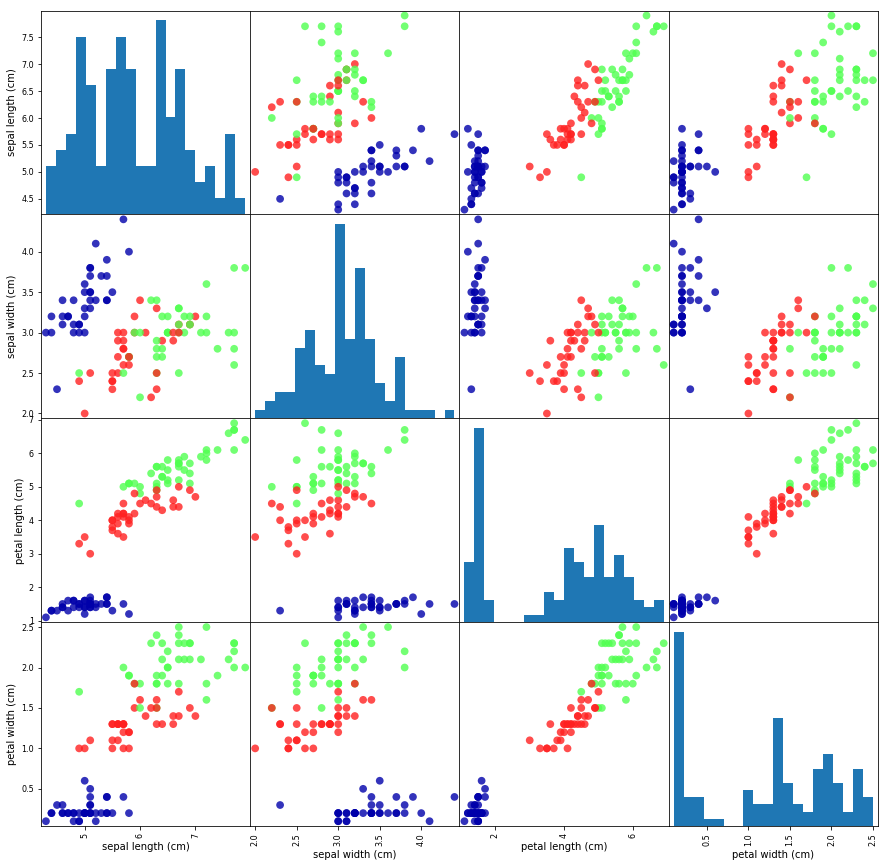

In [10]:
plt.show()

## Classifying data

### Decision Trees

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
clf=DecisionTreeClassifier() # define a new classifier clf

Some more helper libraries:

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
clf=clf.fit(X_train, y_train) # perform training

In [15]:
y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)

97.3684210526


### Bayes Classifier

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
clf=GaussianNB()

In [18]:
clf=clf.fit(X_train, y_train) # perform training
y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)

100.0


### KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [21]:
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

97.3684210526


## Advanced Plotting

### 2D

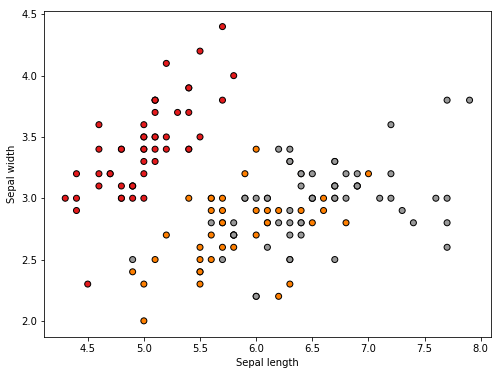

In [22]:
# import some data to play with
iris = iris_dataset
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)
#plt.xticks(())
#plt.yticks(())
plt.show()

### Principle Component Analysis - 3D

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

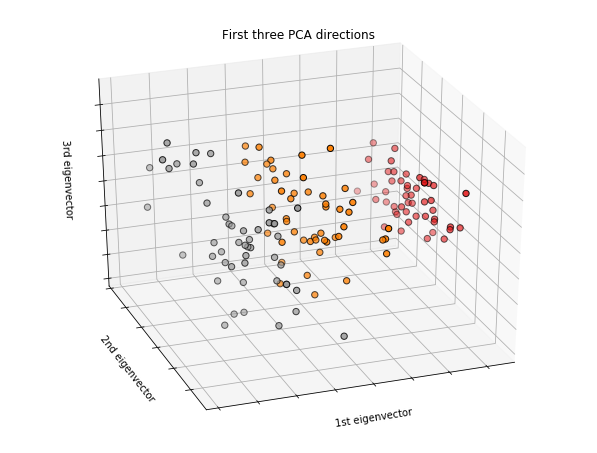

In [24]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions

#https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/
'''
An eigenvalue is a number, telling you how much variance there is in the data in that direction, 
in the example above the eigenvalue is a number telling us how spread out the data is on the line. 
The eigenvector with the highest eigenvalue is therefore the principal component.
'''

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()